# Term Project 최종보고서

## 1. 주제 선정 이유
응급상황이나 자연재해 발생하였을 때에는 119소방서, 119안전센터 그리고 응급실 및 응급센터의 상호작용이 중요하다. 응급상황 시 119소방서와 119안전센터가 정확하게 신고를 접수받고 신속하게 응급차를 보내 인근 응급실로 환자를 이동시켜야 한다. 응급상황이 발생하는 장소는 다양하므로 119소방서와 119안전센터 그리고 응급실 및 응급센터가 효율적으로 운영되어야 한다.
    
Term project를 통해 ___서울시와 경기도___ 에 한해서 119소방서와 119안전센터 그리고 응급실 및 응급센터가 효율적으로 분배되어 있는지 확인하다. 만약 그렇지 못하다면 어떠한 해결책을 통해 문제를 해결할 수 있는지 프로젝트를 통해 알아보려고 한다.

## 2. 가설 정의
__서울시와 경기도__ 의 119소방서, 119안전센터, 응급실 및 응급센터는 기존과 더불어 ```추가적```으로 설치되어야 한다.

## 3. 인터넷을 통한 데이터 획득
### &nbsp;&nbsp;&nbsp;Term project에 사용된 데이터
* '서울 열린데이터 광장'의 '서울시 소방서관할 위치정보 (좌표계_ WGS1984).csv'
* '서울 열린데이터 광장'의 '서울시 안전센터관할 위치정보 (좌표계_WGS1984).csv'
* '서울 열린데이터 광장'의 '서울시 응급실 위치 정보.csv'
* '공공데이터포털'의 '경기도소방서현황및관할구역현황.csv'
* '공공데이터포털'의 '응급의료기관및응급의료지원센터현황.csv'
* '공공데이터포털'의 '전국 119안전센터 현황.csv'
 
서울시와 경기도의 119소방서, 119안전센터, 응급실 및 응급센터의 위치값을 가져오기 위해 위의 사이트들에서 csv 파일들을 다운로드 하였다. 다루고 있는 데이터들의 좌표값(경도,위도)과 시설명, 주소들의 정확도가 중요하였기 때문에 csv파일 속 오류가 있는 경우에는 직접 파일을 수정하였다.<br><br>
하지만 오류가 아닌 누락의 경우에는 다른 방식으로 해결하였다. 예를들어 경기도의 119안전센터의 경우 좌표값이 누락되어 있었다. 이러한 경우에는 kakao api를 통해 주소값으로 좌표값을 얻어오는 방식으로 해결하였다.


## 4. 분석을 위한 데이터의 가공 

```python
#!pip install numpy                 # numpy 패키지
#!pip install pandas                # pandas 패키지
#!pip install folium                # folium 패키지
#!pip install seaborn               # seaborn 패키지
#!pip install -U scikit-learn       # scikit-learn 패키지
#!pip install branca                # branca 패키지(folium 보조)
#!pip install pyOpenSSL             # pyOpenSSL 패키지
#!pip install haversine              # haversine 패키지 
#!pip install ndg-httpsclient

import numpy as np
import pandas as pd
import folium
import random
import requests, json
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

from matplotlib import font_manager, rc    # 폰트 세팅을 위한 모듈 추가
from branca.element import Figure          # folium 보조 
from sklearn.cluster import KMeans         # k-means clustering
from folium import plugins                 # folium 보조
from haversine import haversine            # 경도,위도를 이용한 거리 계산

%matplotlib inline
```

 pandas 모듈의 ```read_csv()``` 함수를 사용하여 각 csv 파일의 dataframe(df)들을 가져온 후, ```df.columns```함수를 이용해 데이터의 종류를 확인하였다.<br> dataframe을 대략적으로 파악하기 위해서 ```df.info(), df.head(), df.sample()``` 함수들을 활용하였다.<br>
 column들 중 필요한 '경도', '위도', '주소', '장소명'을 기준으로 indexing하고 ```df['컬럼명'].tolist()``` 함수를 통해 데이터를 가공하였다. <br>
 또한 데이터가 존재해야 할 곳에서 ```df.isnull()``` 함수를 통한 결측치값이 발견되는 경우에는 해당 csv파일을 확인하여 수정한 바 있다.<br>
 <br>데이터프레임으로부터 추출한 데이터들을 각 class(__SafetyCenter,FireStation,EmergencyCenter__)에서 관리하도록 하였다. class에 해당하는 csv파일을 활용해 '위도','경도','시설명' 데이터를 각 개체의 초기변수에 저장해 놓는다.<br>각 클래스들의 변수들을 기반으로 데이터 시각화(folium) 혹은 분석(k-means clustering)을 위한 함수들은 class(__Management__)에서 수행한다.<br><br>
함수를 구현하는 과정에서 발생하는 데이터 가공은 ```5. 분석 결과 도출```에서 서술하였다.

## 5. 분석 결과 도출

### 직접 개발한 Python 소스코드 원본

In [1]:
!pip install numpy                 # numpy 패키지
!pip install pandas                # pandas 패키지
!pip install folium                # folium 패키지
!pip install seaborn               # seaborn 패키지
!pip install -U scikit-learn       # scikit-learn 패키지
!pip install branca                # branca 패키지(folium 보조)
!pip install pyOpenSSL             # pyOpenSSL 패키지
!pip install haversine              # haversine 패키지 
!pip install ndg-httpsclient

import numpy as np
import pandas as pd
import folium
import random
import requests, json
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
from branca.element import Figure       # folium 보조 
from sklearn.cluster import KMeans      # k-means clustering
from folium import plugins              # folium 보조
from haversine import haversine         # 경도,위도를 이용한 거리 계산


ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


In [2]:

# Management 클래스
class Management:
    def __init__(self):
        print("관리 객체 생성")
        Management.__set_font()
        self.center_loc = {}

    def __set_font():
        font_path = "./malgun.ttf" # 사용할 폰트명 경로 삽입
        font = font_manager.FontProperties(fname = font_path).get_name()
        rc('font', family = font)

    # Kakao API를 통한 특정 주소에 대한 좌표(경도,위도) 설정
    def get_location(self, address):
        url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
        headers = {"Authorization": "KakaoAK c1848693052b32ce219a7cdb76381218"}
        api_json = json.loads(str(requests.get(url, headers=headers).text))

        address = api_json['documents'][0]['address']
        if address == None:
            return False
        crd = {"lat": float(address['y']), "lng": float(address['x'])} # api를 통해 받아온 좌표를 dictionary에 저장
        
        time.sleep(0.1) # url request의 과부하를 방지.

        return crd
    
    def k_means_cluster(self, obj_li, cluster_li):
        
        warnings.filterwarnings('ignore')  # 'Kmeans memory-leak' 에러메세지 무시(고질적 문제)
        fig, axes = plt.subplots(1,3,figsize=(15,5))
        
        
        for obj,n,k in zip(obj_li, cluster_li, range(3)):    
            data = []
            x,y,p = obj.get_info() # 각 obj에 해당하는 좌표를 가져온다.
            for i in range(len(x)):
                data.append([x[i],y[i]]) # data에 좌표를 저장.
        
            data = pd.DataFrame(data,columns=["경도","위도"]) # list(data)를 기반으로한 dataframe 생성.
        
            # k-means clustering using sklearn
            kmeans = KMeans(n_clusters=n, n_init='auto')
            kmeans.fit(data)
            centroid = kmeans.cluster_centers_
            df_result = data.copy()
            df_result["cluster"] = kmeans.labels_
            
            # centroid좌표를 기존의 dataframe에 추가
            for cent in centroid:
                new_row = {"경도" : cent[0], "위도" : cent[1], "cluster" : int(kmeans.predict(cent.reshape(1,2)))}
                df_result = df_result.append(new_row, ignore_index = True)
            
            
            # centroid를 포함하지 않은 dataframe을 기반으로한 산점도
            axes[k].set_title(obj.name + ": " + str(obj))
            sns.scatterplot(x="경도", y="위도", hue="cluster", data=df_result.iloc[:-1*n,:], palette="Set2",legend=False,ax=axes[k])
            
            # centroid좌표 중 추가시설이 될 좌표 선택 
            for c in centroid:
                idx = df_result.index[(df_result['경도'] == c[0]) & (df_result['위도'] == c[1])][0]
                t_result = df_result[df_result["cluster"] == df_result.loc[idx,"cluster"]] # 특정 centroid가 속해있는 cluster에 속한 dataframe
                count  = 0   # 조건에 부합하는 경우를 count
                
                for lng, lat in t_result.to_numpy()[:,:2]:    
                    lv = (lat,lng)     # 위도,경도
                    rv = (c[1],c[0])   # 위도,경도
                    distance = haversine(lv,rv, unit = "km")  # 두 좌표(위도, 경도) 사이의 거리
                    
                    if distance < 6.0:
                        continue
                    else:
                        count += 1
                        
                # centroid좌표 중 추가시설이 되는 조건문
                if count >= len(t_result.iloc[:-1*n,:]) * 0.5: 
                    axes[k].scatter(c[0],c[1],c='black',s=4.5)
                    obj.set_extra_facility(c[0],c[1]) # 추가시설 좌표값 추가
        plt.show()
        
        
    
    def folium_map(self, obj_safe=None, obj_fire=None, obj_emer=None):
        
        # center_address = input("please enter the address : ")
        center_address = "강남구 삼성동"   # 초기화만 해놓은 상태이고, 어떤 주솟값이 와서 상관없다.
        
        while(True):
            self.center_loc = self.get_location(center_address) # 사용자가 입력한 주소에 해당하는 좌표값
            if self.center_loc != False:
                break
            center_address = input("Retype proper address: ")
        
        # location=(위도,경도)
        m = folium.Map(location=[self.center_loc['lat'],self.center_loc['lng']], 
               zoom_start=13, tiles='Stamen Terrain')

        fig = Figure(width = 1000, height = 500)
        fig.add_child(m)
        plugins.LocateControl().add_to(m)
        
        folium.Marker([self.center_loc['lat'],self.center_loc['lng']],
                      icon=folium.Icon(color='black',prefix='fa',icon='user')).add_to(m)
        
        if obj_safe != None:
            obj_safe.folium_indiv_map(m)
        if obj_fire != None:
            obj_fire.folium_indiv_map(m)
        if obj_emer != None:
            obj_emer.folium_indiv_map(m)

        return m
    

# SafetyCenter 클래스
class SafetyCenter(Management):
    def __init__(self):
        self.name = "119안전센터"
        print("119안전센터 객체 생성")
        self.__x_safety = []
        self.__y_safety = []
        self.__p_safety = []
        self.__seoul_init()
        self.__gyeonggi_init()
        self.new_x_safety = []
        self.new_y_safety = []

    def __seoul_init(self):
        df_seoul_safety = pd.read_csv("./서울시 안전센터관할 위치정보 (좌표계_ WGS1984).csv", encoding = 'cp949', low_memory = False)
        self.__x_safety = df_seoul_safety['경도'].tolist()
        self.__y_safety = df_seoul_safety['위도'].tolist()
        self.__p_safety = df_seoul_safety['센터명'].tolist()

    def __gyeonggi_init(self):
        df_total_safety = pd.read_csv("./전국 119안전센터 현황.csv", encoding = 'cp949', low_memory = False)
        df_gg_safety = df_total_safety[df_total_safety["시도본부"] == '경기']
        df_gg_safety = df_gg_safety.reset_index(drop=True) # csv파일 안에서 경기도의 정보만을 추출해서 index를 초기화한다.
        tmp = df_gg_safety['주소'].tolist()
        
        for i in tmp:
            c = self.get_location(i)
            self.__x_safety.append(c['lng'])
            self.__y_safety.append(c['lat'])
        self.__p_safety.extend(df_gg_safety["119안전센터명"].tolist())
    
    def get_info(self):
        return self.__x_safety, self.__y_safety, self.__p_safety
    
    def __str__(self):
        return str(len(self.__x_safety))
    
    def folium_indiv_map(self, _m):
        # 기존의 시설좌표 시각화
        for i in range(len(self.__x_safety)):
            folium.Marker([self.__y_safety[i],self.__x_safety[i]],icon=folium.Icon(color='blue',prefix='fa',icon='building'),
                          popup='<b>safety</b>',tooltip='<i>'+self.__p_safety[i]+'</i>').add_to(_m)
        
        if len(self.new_x_safety) == 0:
            return
        else:
            # 추가 시설좌표 시각화
            for i in range(len(self.new_x_safety)):
                folium.Marker([self.new_y_safety[i],self.new_x_safety[i]],icon=folium.Icon(color='black',prefix='fa',icon='building'),
                          popup='<b>safety</b>').add_to(_m)
    
    # 추가 시설좌표 추가
    def set_extra_facility(self,x,y):
        self.new_x_safety.append(x)
        self.new_y_safety.append(y)
        


# FireStation 클래스
class FireStation(Management):
    def __init__(self):
        self.name = "119소방서"
        print("119소방서 객체 생성")
        self.__x_firestation = []
        self.__y_firestation = []
        self.__p_firestation = []
        self.__seoul_init()
        self.__gyeonggi_init()
        self.new_x_firestation = []
        self.new_y_firestation = []


    def __seoul_init(self):
        df_seoul_911 = pd.read_csv("./서울시 소방서관할 위치정보 (좌표계_ WGS1984).csv", encoding = 'cp949', low_memory = False)
        self.__x_firestation = df_seoul_911['경도'].tolist()
        self.__y_firestation = df_seoul_911['위도'].tolist()
        self.__p_firestation = df_seoul_911['서소이름'].tolist()

    def __gyeonggi_init(self):
        df_gg_911 = pd.read_csv("./경기도소방서현황및관할구역현황.csv", encoding = 'cp949', low_memory = False)
        self.__x_firestation.extend(df_gg_911['WGS84경도'].tolist())
        self.__y_firestation.extend(df_gg_911['WGS84위도'].tolist())
        self.__p_firestation.extend(df_gg_911['전체기관명'].tolist())

    def get_info(self):
        return self.__x_firestation, self.__y_firestation, self.__p_firestation
    
    def __str__(self):
        return str(len(self.__x_firestation))
    
    def folium_indiv_map(self, _m):
        # 기존의 시설좌표 시각화
        for i in range(len(self.__x_firestation)):
            folium.Marker([self.__y_firestation[i],self.__x_firestation[i]],icon=folium.Icon(color='red', prefix='fa',icon='fire'),
                          popup='<b>firestation</b>',tooltip='<i>'+self.__p_firestation[i]+'</i>').add_to(_m)
            
        if len(self.new_x_firestation) == 0:
            return
        else:
            # 추가 시설좌표 시각화
            for i in range(len(self.new_x_firestation)):
                folium.Marker([self.new_y_firestation[i],self.new_x_firestation[i]],icon=folium.Icon(color='black',prefix='fa',icon='fire'),
                          popup='<b>firestation</b>').add_to(_m)
    
    # 추가 시설좌표 추가
    def set_extra_facility(self,x,y):
        self.new_x_firestation.append(x)
        self.new_y_firestation.append(y)
        
    
    
# EmergencyCenter 클래스
class EmergencyCenter(Management):
    def __init__(self):
        self.name = "응급실 및 응급센터"
        print("응급실 및 응급센터 객체 생성")
        self.__x_emergency = []
        self.__y_emergency = []
        self.__p_emergency = []
        self.__seoul_init()
        self.__gyeonggi_init()
        self.new_x_emergency = []
        self.new_y_emergency = []

        
    def __seoul_init(self):
        df_seoul_emergence = pd.read_csv("./서울시 응급실 위치 정보.csv", encoding = 'cp949', low_memory = False)
        self.__x_emergency = df_seoul_emergence['병원경도'].tolist()
        self.__y_emergency = df_seoul_emergence['병원위도'].tolist()
        self.__p_emergency = df_seoul_emergence['기관명'].tolist()
    
    def __gyeonggi_init(self):
        df_gg_emergence = pd.read_csv("./응급의료기관및응급의료지원센터현황.csv", encoding = 'cp949', low_memory = False)
        self.__x_emergency.extend(df_gg_emergence['경도'].tolist())
        self.__y_emergency.extend(df_gg_emergence['위도'].tolist())
        self.__p_emergency.extend(df_gg_emergence['병원명/센터명'].tolist())

    def get_info(self):
        return self.__x_emergency, self.__y_emergency, self.__p_emergency
    
    def __str__(self):
        return str(len(self.__x_emergency))
    
    def folium_indiv_map(self, _m):
        # 기존의 시설좌표 시각화
        for i in range(len(self.__x_emergency)):
            folium.Marker([self.__y_emergency[i],self.__x_emergency[i]],icon=folium.Icon(color='green', prefix='fa',icon='medkit'),
                          popup='<b>emergency</b>',tooltip='<i>'+self.__p_emergency[i]+'</i>').add_to(_m)
            
        if len(self.new_x_emergency) == 0:
            return
        else:
            # 추가 시설좌표 시각화
            for i in range(len(self.new_x_emergency)):
                folium.Marker([self.new_y_emergency[i],self.new_x_emergency[i]],icon=folium.Icon(color='black',prefix='fa',icon='medkit'),
                          popup='<b>emergency</b>').add_to(_m)
    
    # 추가 시설좌표 추가
    def set_extra_facility(self,x,y):
        self.new_x_emergency.append(x)
        self.new_y_emergency.append(y)
    

# 객체 생성
manage = Management()
safe = SafetyCenter()
fire = FireStation()
emer = EmergencyCenter()

# 객체의 메소드를 통해 해당 데이터들을 추출한다.
x_safety, y_safety, p_safety= safe.get_info()
x_emergency, y_emergency, p_emergency = emer.get_info()
x_firestation, y_firestation, p_firestation = fire.get_info()

print("completed")

관리 객체 생성
119안전센터 객체 생성
119소방서 객체 생성
응급실 및 응급센터 객체 생성
completed


- 부모클래스(Management)에서 자식클래스(SafetyCenter, Firestation, EmergencyCenter)를 이용해 객체들을 생성하였다.<br>
- 생성된 객체들의 ```get_info()```함수를 통해 시설좌표와 시설명을 변수에 저장한 후, 분석을 하였다.

### 5-1 &nbsp;matplotlib의 scatter 함수를 활용한 119안전센터, 응급실 및 응급센터, 119소방서 산점도

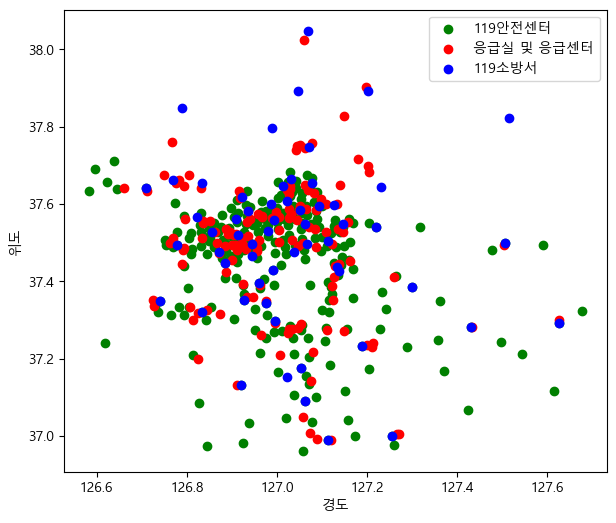

In [3]:
plt.figure(figsize=(7,6))
plt.scatter(x_safety,y_safety,color='green', label='119안전센터')
plt.scatter(x_emergency,y_emergency,color='red', label='응급실 및 응급센터')
plt.scatter(x_firestation,y_firestation,color='blue', label='119소방서')
plt.xlabel("경도");plt.ylabel("위도")
plt.legend()
plt.show()

- 대략적인 119안전센터, 응급실 및 응급센터, 119소방서의 분포도를 확인하기 위해 시각화 하였다.
- 산점도를 통해 서울과 경기 지역에 119안전센터, 응급실 및 응급센터, 119소방서 순으로 분포가 되어있는 것을 확인하였다.
- ___119안전센터와 응급실, 소방서가 유기적으로 운영되려면 특정 범위 내에 골고루 분배되어야 하지만,___ <br>
___위의 산점도를 통해 그렇지 못하다는 것을 확인할 수 있었다.___
- 하지만, 실제 지형을 고려하지 않은 산점도 이므로 folium 패키지를 통해 추가적인 확인이 필요하다.

### 5-2 &nbsp;folium 모듈을 활용한 119안전센터, 응급실 및 응급센터, 119소방서 시각화

In [4]:
mapping = manage.folium_map(safe,fire,emer)
mapping

- 지도상에 위치한 시설들을 시각적으로 잘 보이게 하기 위해 ```folium.Marker()```의 ```Icon```을 시설마다 다르게 설정하였다.<br>
- 소스코드의 ```folium_map()```함수를 사용해 지도와 같은 구성으로 시각화를 하였다.<br>
- ```folium_map()```함수는 Management 클래스에서 관리하며 __input parameter__로 객체를 전달하는데, 전달한 객체만을 지도에 나타나게 한다.
- 부모클래스(Management)의 ```folium_map()```을 통해 자식클래스(SafetyCenter, Firestation, EmergencyCenter)의<br>
메소드(```folium_indiv_map()```)에 접근한 후 지도로 시각화 하였다.
- ```plugins.LocateControl()``` 패키지를 활용해 자신의 현재 위치를 보여주는 User Interface를 구현하였다.
```python
def folium_map(self, obj_safe=None, obj_fire=None, obj_emer=None):
        center_address = input("please enter your address : ")
        
        while(True):
            self.center_loc = self.get_location(center_address)
            if self.center_loc != False:
                break
            center_address = input("Retype your proper address: ")
        
        # location=(위도,경도)
        m = folium.Map(location=[self.center_loc['lat'],self.center_loc['lng']], 
               zoom_start=13, tiles='Stamen Terrain')

        fig = Figure(width = 1000, height = 500)
        fig.add_child(m)
        plugins.LocateControl().add_to(m)
        
        folium.Marker([self.center_loc['lat'],self.center_loc['lng']],
                      icon=folium.Icon(color='black',prefix='fa',icon='user')).add_to(m)
        
        if obj_safe != None:
            obj_safe.folium_indiv_map(m)
        if obj_fire != None:
            obj_fire.folium_indiv_map(m)
        if obj_emer != None:
            obj_emer.folium_indiv_map(m)

        return m
```

- 특정한 지역에 119안전센터, 응급실 및 응급센터 그리고 119소방서가 부족한 경우가 나타났다.
- 지도를 통해 확인한 결과, 실제로 시설이 부족한 지역도 있었지만 __부득이한 상황(산지)__에 의한 원인도 있다는 것을 확인하였다.
- 물론 위와 같은 시설들의 설치여부에는 많은 __제약사항(정책, 예산 등)__들이 존재한다.
#### 따라서 임시방편으로 __k-means clustering__을 활용해서 추가적인 시설들을 확보하려고 한다.




### 5-3 &nbsp;119안전센터, 응급실 및 응급센터, 119소방서에 대한 k-means clustering

#### 5-3-1 &nbsp; ```k_means_cluster()``` 함수 속 핵심 코드
```python
# k-means clustering using sklearn
kmeans = KMeans(n_clusters=n, n_init='auto')
kmeans.fit(data)
centroid = kmeans.cluster_centers_
df_result = data.copy()
df_result["cluster"] = kmeans.labels_
```
- sklearn 패키지를 활용해 data를 n개의 cluster로 구분지어 dataframe(df_result)로 저장하였다.<br><br>
***

```python
# centroid좌표를 기존의 dataframe에 추가
for c in centroid:
    new_row = {"경도" : c[0], "위도" : c[1], "cluster" : int(kmeans.predict(c.reshape(1,2)))}
    df_result = df_result.append(new_row, ignore_index = True)
                        
# centroid를 포함하지 않은 dataframe을 기반으로한 산점도
axes[k].set_title(obj.name + ": " + str(obj))
sns.scatterplot(x="경도", y="위도", hue="cluster", data=df_result.iloc[:-1*n,:], palette="Set2",legend=False,ax=axes[k])
```
- 기존 시설들의 좌표와 더불어 centroid좌표들도 dataframe에 포함하여 저항하였다.<br>
- 기존의 좌표와 centroid좌표간의 분리를 확실히 하기 위해 기존시설들의 좌표만을 먼저 시각화(```sns.scatterplot()```)하였다.<br><br>
***

```python
# centroid좌표 중 추가시설이 될 좌표 선택 
for c in centroid:
    idx = df_result.index[(df_result['경도'] == c[0]) & (df_result['위도'] == c[1])][0] # dataframe속 centroid의 index
    
    # 특정 centroid가 속해있는 cluster에 속한 dataframe
    t_result = df_result[df_result["cluster"] == df_result.loc[idx,"cluster"]] 
    count  = 0   # 조건에 부합하는 경우를 count
                
    for lng, lat in t_result.to_numpy()[:,:2]:    
        lv = (lat,lng)     # 위도,경도
        rv = (c[1],c[0])   # 위도,경도
        distance = haversine(lv,rv, unit = "km")  # 두 좌표(위도, 경도) 사이의 거리
                    
        if distance < 6.0:
            continue
        else:
            count += 1
            
    # centroid좌표 중 추가시설이 되는 조건문
    if count >= len(t_result) * 0.5: 
        axes[k].scatter(c[0],c[1],c='black',s=4.5)
        obj.set_extra_facility(c[0],c[1])
        
plt.show()
```
- 3개의 시설(119안전센터, 응급실 및 응급센터, 119소방서)에 대해 k-means clustering 알고리즘을 수행한 상태에서 특정 cluster안의 centroid와 나머지 data(위도,경도)들만을 indexing해서 분석을 하였다. __각 시설의 종류에 따라 clustering 알고리즘을 수행하였다.__<br>
- 기존의 시설좌표들을 토대로 시험적인 분석을 한 결과, 두 좌표(위도,경도) 사이의 거리가 __6km이상 떨어져 있는 것이 적당__하다는 것을 확인하였다. 두 좌표 사이의 거리를 계산하기 위해서 ```haversine```패키지를 이용하였다.<br>
- 하지만 centroid 좌표가 의미하는 것은 __특정 cluster__내에서 data들을 가장 잘 대표할 수 있는 것이므로, centroid좌표가 정확하게 주변 시설과 6~7km가 떨어져 있게 하는 것은 불가능하다.<br>
- 따라서 __특정 cluster__안에서 centroid 좌표와 나머지 시설좌표 사이의 거리를 6km 이상이 되는 경우가 50%이상이 발생하는 경우에만 centroid좌표에 시설을 설치하였다. 그리고 ```set_extra_facility()```함수를 통해 추가적인 시설좌표를 각 class 객체에 저장하였다.


#### 5-3-2&nbsp; 기존 시설과 추가된 시설 시각화

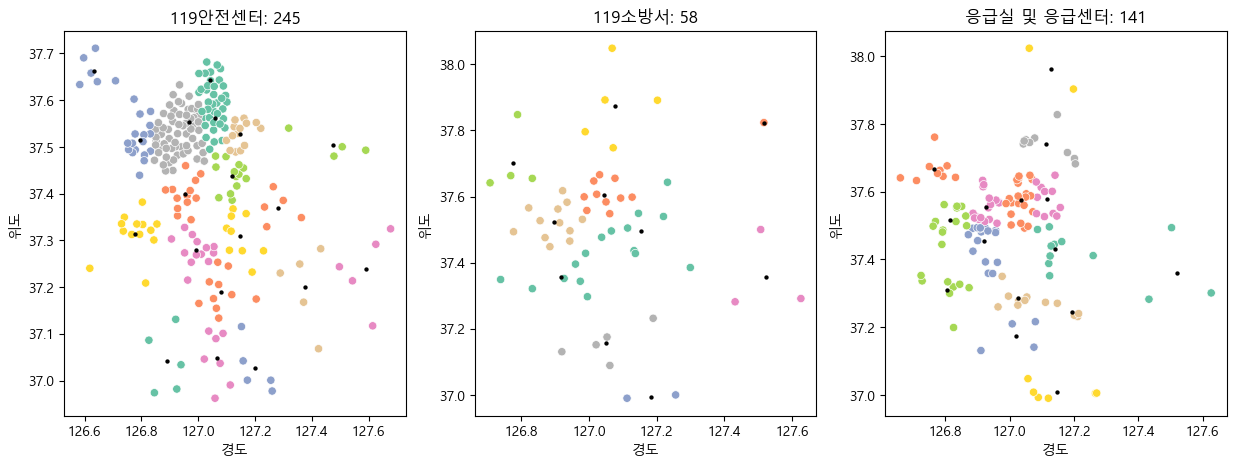

In [5]:
obj_list = [safe,fire,emer]
cluster_list = [20,10,15]
manage.k_means_cluster(obj_list,cluster_list)

여기서 k-means clustering을 사용한 이유는 다음과 같다.
1) k-means clustering은 데이터들을 __군집화__시켜 결과적으로 데이터의 양을 감소시켜주는 머신러닝 알고리즘이다.<br><br>
2) 여기서 __centroid는 각 군집(cluster)안에서 대표값으로 볼 수 있다.__<br><br>
3) k-means clustering 알고리즘에 따르면 centroid 좌표는 군집내의 모든 좌표의 평균좌표에 해당하다.<br><br>
4) 따라서 119안전센터, 응급실 및 응급센터 각각에 대해 k-means clustering을 적용해서 추가적인 시설을 설치하려는 것이 본 소스코드의 목적이다.<br><br>

- k-means clustering을 통해 각 시설들과 clustering을 통한 centroid들을 산점도로 나타내보았다.<br>
- 각 시설들의 분포 속에서 군집화를 통해 최적화된 centroid는 산점도(검은색)로 나타내었다.<br>
- ```cluster_list```는 clustering 알고리즘을 사용할 때 몇개의 cluster로 데이터를 대표할 것인지를 의미하는 list이다.<br>
- 즉 적절한 cluster_list값으로 생성된 centroid 좌표에 시설을 추가적으로 설치하는 것이 이상적이다.<br>
- 몇번의 시도를 통해 적절한 ```cluster_list = [20,10,15]```을 설정하였다.


#### 5-3-3&nbsp; 추가된 시설들을 포함한 folium 시각화

```3개의 클래스에 대해 동일한 유사한 코드가 반복되므로 SafetyCenter 클래스의 함수만을 가져와 설명하였다.```<br>
```Management 클래스의 folium_map()함수에서 내부적으로 folium_indiv_map() 함수가 실행된다.```

```python
def folium_indiv_map(self, _m):
    for i in range(len(self.__x_safety)):
        folium.Marker([self.__y_safety[i],self.__x_safety[i]],icon=folium.Icon(color='
         blue',prefix='fa',icon='building'),popup='<b>safety</b>',tooltip='<i>'+self.__p_safety[i]+'</i>').add_to(_m)
        
        if len(self.new_x_safety) == 0:
            return
        else:
            for i in range(len(self.new_x_safety)):
                folium.Marker([self.new_y_safety[i],self.new_x_safety[i]],icon=folium.Icon(color='
                 black',prefix='fa',icon='building'),popup='<b>safety</b>').add_to(_m)
```

- 기존의 시설들을 먼저 지도에 나타냈다.
- ```if len(self.new_x_safety) == 0``` 조건문을 통해 객체의 새로운 시설좌표가 추가된 경우에 지도에 추가적으로 나타냈고, 검은색으로 기존의 시설들과 차별을 두었다.<br><br>

#### 주의 : 아래의 clustering을 통한 folium_map() 함수를 중복으로 계속 호출하면 추가적으로 새로운 시설들이 추가되므로 한번 만 출력해야 한다.

In [6]:
updated_mapping = manage.folium_map(safe,fire,emer)
updated_mapping

- 새로 설치된 시설들의 marker는 __검은색__으로 표시하였다.<br>

## 6. 결론

#### 지형등은 고려하지 않고 시설들을 추가로 설치하였기 때문에 설치가 어려운 ```하천``` 주변이나 ```산지```에 설치되는 경우도 발생하였다.
#### 또한 k-means clustering을 하는 과정에서 시설을 설치하는 조건(6km이하가 50%이상)에 따라 어쩔수 없이 같은 시설이 가까운 곳에 중복으로 설치되는 경우도 발생하였다.
#### 하지만 유의미한 분석결과도 발견할 수 있었다.
#### 예를들어 소방서의 경우에 산지에 추가적으로 설치되는 경우도 있었는데, 여건이 된다면 산지에 설치하는 것이 화재나 인명구조 등 여러모로 도움이 될 수 있을 것이다.
#### 또한 시설들이 굉장히 적게 포진되어있는 지역에서는 ```k-means clustering을 통한 centroid```에 시설을 설치하는 것이 용이하다는 것을 발견할 수 있었다. 
#### 지도에 시설들을 시각화하면서 대체적으로 효율적으로 ```119안전센터, 응급실 및 응급센터 그리고 119소방서```가 설치된 것을 확인할 수 있었다.
#### 하지만 ```수도권과 경기도의 바깥쪽```에 해당하는 지역에는 현저히 시설들이 적게 위치한 것을 확인할 수 있었다.
#### 따라서 위에서 본 것처럼 추가적으로 설치된 시설들이 생긴다면 더욱 효과적인 운영이 가능하다는 분석을 할 수 있었다.


## 7. 참고문헌
https://seaborn.pydata.org/generated/seaborn.scatterplot.html : scatterplot 관련 참고<br><br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html : k-means clustering 관련 참고<br><br>
https://parkgihyeon.github.io/project/geocoding-api/ : 카카오 api 사용 관련 참고<br><br>
https://python-visualization.github.io/folium/ : folium 모듈 사용 관련<br><br>
https://pypi.org/project/haversine/ : haversine 패키지 사용 관련<br><br>
https://stackoverflow.com/questions/69596239/how-to-avoid-memory-leak-when-dealing-with-kmeans-for-example-in-this-code-i-am : k-means clustering memory leak problem<br><br>
https://getbootstrap.com/docs/3.3/components/#glyphicons : folium.Marker()의 Icon 종류<br><br>

## 8. 별첨 (데이터 원본은 제출파일에 첨부)

```python
df_seoul_safety = pd.read_csv("./서울시 안전센터관할 위치정보 (좌표계_ WGS1984).csv", encoding = 'cp949', low_memory = False)

df_total_safety = pd.read_csv("./전국 119안전센터 현황.csv", encoding = 'cp949', low_memory = False)

df_seoul_911 = pd.read_csv("./서울시 소방서관할 위치정보 (좌표계_ WGS1984).csv", encoding = 'cp949', low_memory = False)

df_gg_911 = pd.read_csv("./경기도소방서현황및관할구역현황.csv", encoding = 'cp949', low_memory = False)

df_seoul_emergence = pd.read_csv("./서울시 응급실 위치 정보.csv", encoding = 'cp949', low_memory = False)

df_gg_emergence = pd.read_csv("./응급의료기관및응급의료지원센터현황.csv", encoding = 'cp949', low_memory = False)
```


## 9. 별첨 ( 5번 항목의  소스코드의 주석 참고)

## 10. 별첨 ( 5. 분석 결과 도출 부분에서 확인 가능)